# Import Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
#create engine with sqlite file in Resources directory
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables in the DB

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
# Holiday date range: March 1, 2021 - March 14, 2021

# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year prior to the most recent data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Most Recent Data Point in the Database: ", last_date)
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date (One Year Prior to Most Recent Data Point): ", query_date)

Most Recent Data Point in the Database:  ('2017-08-23',)
Query Date (One Year Prior to Most Recent Data Point):  2016-08-23


In [10]:
# Perform a query to retrieve the data and precipitation scores for the last 12 months of data
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= query_date).\
    order_by(Measurement.date.desc()).all()

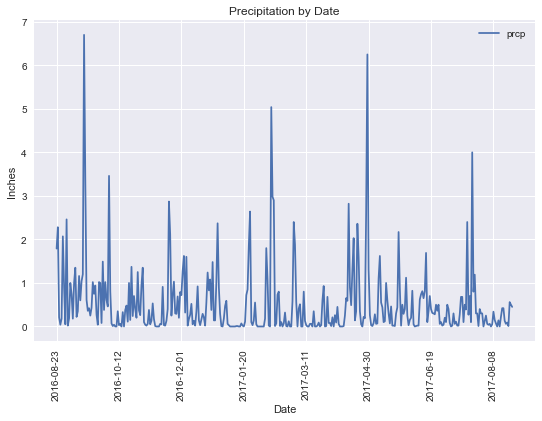

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results,columns=["date","prcp"])
df.set_index('date', inplace=True)

# Sort the dataframe by date
date_gb=df.groupby("date").max()
# Use Pandas Plotting with Matplotlib to plot the data
style.use('seaborn')
date_gb.plot(rot=90,xlabel="Date",ylabel="Inches",title="Precipitation by Date",legend=True)
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

Design a query to calcualte the total number of stations.

In [18]:
#There's two ways to do this:

#How many rows are in the station DB?
number_of_stations=session.query(Station).count()
print(f'There are {number_of_stations} stations in the dataset.')

There are 9 stations in the dataset.


In [16]:
#How many distrinct station values are in the measurement DB?
no_stations=session.query(Measurement.station).distinct().count()
print(f'There are {no_stations} stations in the dataset.')

There are 9 stations in the dataset.


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Station USC00519281 is the most active station.

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temps_most_active_station=session.query(func.min(Measurement.tobs).filter(Measurement.station=="USC00519281").label("min_temp"),func.max(Measurement.tobs).filter(Measurement.station=="USC00519281").label("max_temp"),func.avg(Measurement.tobs).filter(Measurement.station=="USC00519281").label("avg_temp"))
res=temps_most_active_station.one()
min=res.min_temp
max=res.max_temp
avg=res.avg_temp
print(f'The lowest temperature recorded at the most active station is {min}.')
print(f'The highest temperature recorded at the most active station is {max}.')
print(f'The average temperature recorded at the most active station is {avg}.')


The lowest temperature recorded at the most active station is 54.0.
The highest temperature recorded at the most active station is 85.0.
The average temperature recorded at the most active station is 71.66378066378067.


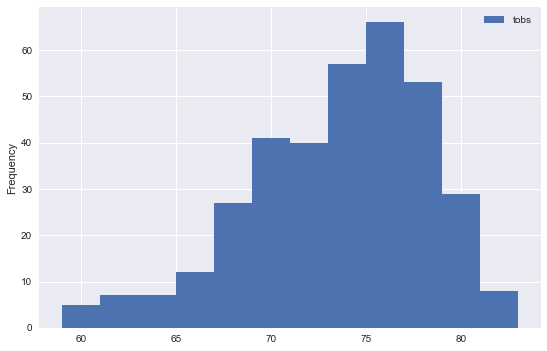

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data=session.query(Measurement.tobs).filter(Measurement.station=="USC00519281").filter(Measurement.date>=query_date)
style.use("seaborn")
df = pd.DataFrame(tobs_data)
df.plot.hist(bins=12)
plt.show()